# Naive Bayes Model 

In this project we will build a Naive Bayes model using the case study below

#### Case Study:
For this activity, you work for a firm that provides insights for management and coaches in the National Basketball Association (NBA), a professional basketball league in North America. The league is interested in retaining players who can last in the high-pressure environment of professional basketball and help the team be successful over time. In the previous activity, you analyzed a subset of data that contained information about the NBA players and their performance records. You conducted feature engineering to determine which features would most effectively predict a player's career duration. You will now use those insights to build a model that predicts whether a player will have an NBA career lasting five years or more. 

The data for this activity consists of performance statistics from each player's rookie year. Our target variable is a Boolean value that indicates whether a given player will last in the league for five years. Since we previously performed feature engineering on this data, it is now ready for modeling.   

### **Task 1. Imports and data loading**


### Import packages

import packages relevant to our analysis


In [239]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [271]:
# load dataset
nba_df = pd.read_csv(r'C:\Users\Ghost\Desktop\project_files\Files\extracted_nba_players_data.csv')

#### **Data overview and summary statistics**

Use the following methods and attributes on the dataframe:

* `head()`
* `shape`
* `describe()`
* `info()`

It's always helpful to have this information at the beginning of a project, where you can always refer back to if needed.

In [247]:
nba_df.head(10)

,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0,266.4,0.270073
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0,252.0,0.267658
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0,384.8,0.339869
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1,330.6,0.491379
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1,216.0,0.391304
5,42.3,32.5,73.2,0.8,1.8,0.4,0.0,0.7,0,277.5,0.324561
6,43.5,50.0,81.1,2.0,0.6,0.2,0.1,0.7,1,409.2,0.605505
7,41.5,30.0,87.5,1.7,0.2,0.2,0.1,0.7,1,273.6,0.553398
8,39.2,23.3,71.4,0.8,2.3,0.3,0.0,1.1,0,156.0,0.242424
9,38.3,21.4,67.8,1.1,0.3,0.2,0.0,0.7,0,155.4,0.435294


In [246]:
nba_df.shape

(1340, 11)

Generate summary statistics using the `describe()` method.

In [248]:
nba_df.describe()

,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs,total_points,efficiency
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,44.169403,19.149627,70.300299,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149,451.783358,0.371078
std,6.137679,16.051861,10.578479,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531,366.520093,0.093659
min,23.800000,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000,14.700000,0.121951
25%,40.200000,0.000000,64.700000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000,172.800000,0.306710
50%,44.100000,22.200000,71.250000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000,338.350000,0.363325
75%,47.900000,32.500000,77.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000,639.675000,0.431326
max,73.700000,100.000000,100.000000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000,2312.400000,0.738462


from our summary stats we can tell that some of our data requires a closer look, e.g columns `ft` and `3p` having 100 as max values. We will have a closer look at these further down this notebook

Generate summary information using the `info()` method.

In [249]:
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fg            1340 non-null   float64
 1   3p            1340 non-null   float64
 2   ft            1340 non-null   float64
 3   reb           1340 non-null   float64
 4   ast           1340 non-null   float64
 5   stl           1340 non-null   float64
 6   blk           1340 non-null   float64
 7   tov           1340 non-null   float64
 8   target_5yrs   1340 non-null   int64  
 9   total_points  1340 non-null   float64
 10  efficiency    1340 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 115.3 KB


### Task 2. Data exploration and cleaning

Check for missing data, duplicates and outliers and handle them accordingly


Check for missing values using the `isna()` method

In [250]:
nba_df.isna().sum()

fg              0
3p              0
ft              0
reb             0
ast             0
stl             0
blk             0
tov             0
target_5yrs     0
total_points    0
efficiency      0
dtype: int64

Check for number of duplicates using the `duplicated()` method

In [251]:
nba_df.duplicated().sum()

12

isolate duplicated value for closer look

In [252]:
mask = nba_df.duplicated(keep = False)
nba_df[mask]

,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs,total_points,efficiency
162,44.4,0.0,69.7,1.2,1.7,0.6,0.1,0.6,1,174.0,0.333333
163,44.4,0.0,69.7,1.2,1.7,0.6,0.1,0.6,1,174.0,0.333333
165,49.5,0.0,72.5,6.5,1.5,1.0,1.3,2.1,1,1157.3,0.536184
166,49.5,0.0,72.5,6.5,1.5,1.0,1.3,2.1,1,1157.3,0.536184
168,39.2,31.9,54.5,0.8,0.6,0.3,0.2,0.8,1,119.0,0.406977
169,39.2,31.9,54.5,0.8,0.6,0.3,0.2,0.8,1,119.0,0.406977
242,35.6,22.4,72.7,3.4,1.7,0.8,0.6,1.8,1,364.0,0.424490
243,35.6,22.4,72.7,3.4,1.7,0.8,0.6,1.8,1,364.0,0.424490
338,52.8,0.0,43.5,3.8,0.3,0.2,0.3,0.9,0,262.4,0.322835
339,52.8,0.0,43.5,3.8,0.3,0.2,0.3,0.9,0,262.4,0.322835


we have 12 sets of duplicated values. we should remove them 

In [253]:
# remove duplicates
nba_df = nba_df.drop_duplicates()

# confirm changes
nba_df.duplicated().sum()

0

Check features for outliers using boxplots 

since we have about 10 features, to save time we can define a function and print the boxplots for all features at once

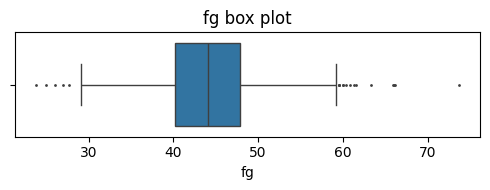

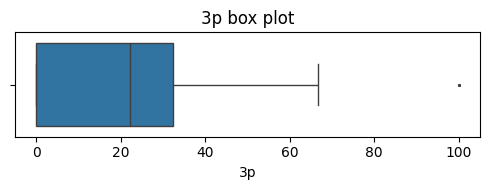

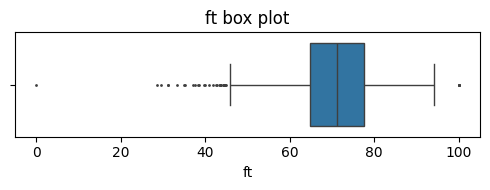

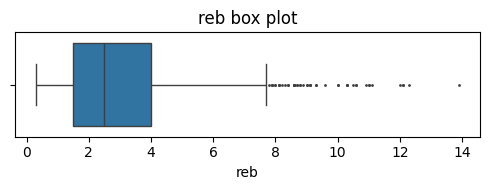

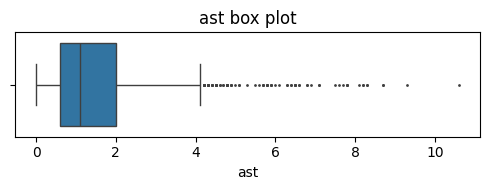

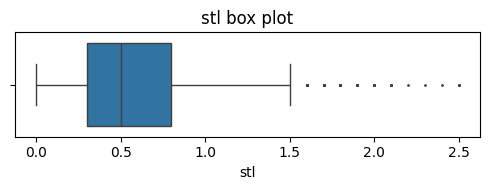

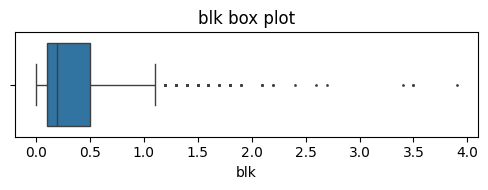

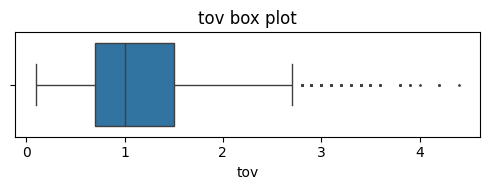

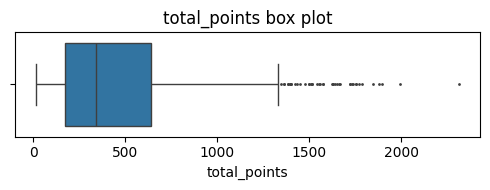

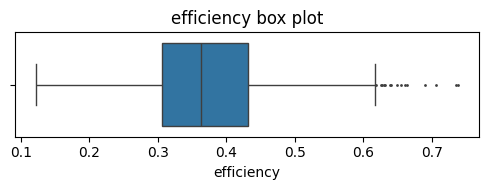

In [279]:
# define boxplot function
def boxplot(column_name):
    plt.figure(figsize = (5,2))
    sns.boxplot(x = nba_df[column_name], fliersize = 1)
    plt.title(column_name +  ' box plot')
    plt.tight_layout()
    plt.show()
# apply function to required features and display them
# we will not create plot for target_5yrs since it is a boolean feature

for column in nba_df.columns:
    if column != 'target_5yrs':
        boxplot(column)

Our columns all show a number of outliers which is not unusual for this type of data. Player performance data usually include some extremes from both the best and worst players.

This further establishes the importance of domain knowledge when working with data. Understanding how the sport works can help us better understand why the data is the way that it is.

There is a concern however, our `3p`  and `ft` box plots both include players with a 100% success rate which is only possible if they made a very small number of attempts or if there was an error in data collection. This confirms our suspicision when we checked the summary statistics for both feature. we can isolate the outliers to have a closer look.

In [255]:
# isolate outliers
mask = (nba_df['ft'] == 100) | (nba_df['3p'] == 100)
nba_df[mask]

,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs,total_points,efficiency
45,45.2,100.0,82.1,2.7,0.6,0.5,0.3,0.6,1,248.4,0.305085
609,40.7,39.3,100.0,1.5,0.8,0.3,0.2,0.4,0,119.6,0.172932
625,35.3,30.0,100.0,0.8,0.2,0.1,0.1,0.3,1,71.3,0.484375
663,38.1,37.8,100.0,0.9,0.9,0.3,0.1,0.6,1,110.2,0.333333
851,36.0,33.3,100.0,0.7,0.2,0.1,0.0,0.1,1,52.5,0.272727
1053,48.7,100.0,70.3,2.2,0.3,0.1,0.1,0.4,1,140.0,0.217391
1108,36.4,32.7,100.0,0.9,1.5,0.3,0.1,0.9,1,119.0,0.269231
1174,39.0,100.0,63.7,4.1,0.6,0.3,1.0,1.2,1,367.2,0.349315
1253,59.1,100.0,48.9,3.3,0.5,0.2,0.6,0.5,0,179.4,0.304688


There are only 9 entries where players recorded a 100% rate in `ft` or `3p`. A small percentage of our data. 

Referring back to the original dataset or requesting more information about the data would be the proper way to go but for the sake of this project we can assume that this was due to an error and replace these values with the value of the 95th percentile of each feature.

we can define a short function to do this

In [256]:
# define function
def outlier_(column_name):
    limit = nba_df[column_name].quantile(0.95)
    nba_df.loc[nba_df[column_name] > limit, column_name] = limit

# apply function to ft and 3p columns
outlier_('ft')
outlier_('3p')

# confirm changes
nba_df[['ft', '3p']].describe()

,ft,3p
count,1328.000000,1328.000000
mean,70.122816,18.769277
std,10.198134,15.104739
min,0.000000,0.000000
25%,64.700000,0.000000
50%,71.250000,22.200000
75%,77.600000,32.500000
max,85.100000,40.000000


## Step 2: Model preparation

### Check class balance
It is important for the target variable to have a good class balance

In [264]:
nba_df['target_5yrs'].value_counts(normalize = True)

target_5yrs
1    0.620149
0    0.379851
Name: proportion, dtype: float64

62% of the data accounts for players with a 5+ years career in the NBA, while players with less than 5 years in the NBA make up the remaining 38%.

### Isolate target and predictor variables
Separately define the target variable (`target_5yrs`) and the features.

In [272]:
# define the y (target) variable.
y = nba_df['target_5yrs']

# define the X (predictor) variables.
x = nba_df.drop('target_5yrs', axis = 1)

#### **Split the data**

Use scikit-learn's `train_test_split()` function to split our data.

In [274]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)


## Step 3: Model building

We will use a Gaussian Naive Bayes algorithm for this project

#### Fit model to training data and predict on our test data

In [275]:
# instantiate GaussianNB
gnb = GaussianNB()


# fit the model
gnb.fit(x_train, y_train)


# generate predictions
y_pred = gnb.predict(x_test)

## Step 4: Results and evaluation


display our model's accuracy, precision, recall and f1

In [276]:
# print out our evaluation parameters

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f' Accuracy: {accuracy}')
print(f' Precision: {precision}')
print(f' Recall: {recall}')
print(f' F1: {f1}')

 Accuracy: 0.6895522388059702
 Precision: 0.8405797101449275
 Recall: 0.5858585858585859
 F1: 0.6904761904761905


#### **Show results with a confusion matrix**

Use the `confusion_matrix()` function to obtain a confusion matrix. Use `y_test` and `y_preds` as arguments.

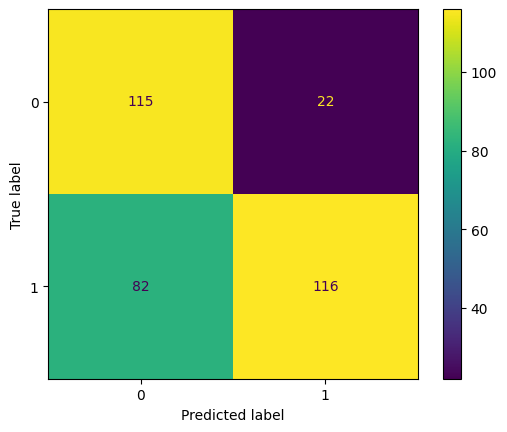

In [277]:
cm = confusion_matrix(y_test, y_pred, labels = gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = gnb.classes_)
disp.plot()
plt.show()

- The values for true positives and true negatives are relatively higher and explains why we had relatively good scores for both accuracy and precision. The recall on the other hand was not so good due to the number of true negatives and false negatives being close to each other.
- Depending on the use case of this model we could request for more data and features and try to apply tuning practices to improve model performance.